In [1]:
import cv2
import os
import sys
import glob
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
import matplotlib.pyplot as plt
from os import listdir
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.utils import draw_segmentation_masks
import matplotlib.patches as patches

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True) 

In [3]:
os.listdir("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/")

['normal', 'benign', 'malignant', 'Cancer_CNN.model', 'model.h5']

In [4]:
path = "/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/malignant"
path1 ="/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/benign"
path2 ="/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/normal"
os.path.join(path,path1)
os.path.join(path,path2)


'/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/normal'

In [5]:
os.listdir("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/malignant")

['malignant (133).png',
 'malignant (12).png',
 'malignant (117)_mask.png',
 'malignant (125)_mask.png',
 'malignant (1)_mask.png',
 'malignant (108)_mask.png',
 'malignant (119)_mask.png',
 'malignant (128)_mask.png',
 'malignant (101).png',
 'malignant (130)_mask.png',
 'malignant (13).png',
 'malignant (100)_mask.png',
 'malignant (106).png',
 'malignant (122)_mask.png',
 'malignant (12)_mask.png',
 'malignant (124).png',
 'malignant (103).png',
 'malignant (11)_mask.png',
 'malignant (11).png',
 'malignant (130).png',
 'malignant (134).png',
 'malignant (106)_mask.png',
 'malignant (126).png',
 'malignant (109)_mask.png',
 'malignant (116).png',
 'malignant (117).png',
 'malignant (123).png',
 'malignant (127).png',
 'malignant (118)_mask.png',
 'malignant (111)_mask.png',
 'malignant (128).png',
 'malignant (126)_mask.png',
 'malignant (132).png',
 'malignant (119).png',
 'malignant (10)_mask.png',
 'malignant (102)_mask.png',
 'malignant (133)_mask.png',
 'malignant (121)_mask.pn

In [6]:
os.listdir("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/benign")

['benign (100).png',
 'benign (100)_mask_1.png',
 'benign (103)_mask.png',
 'benign (10)_mask.png',
 'benign (101)_mask.png',
 'benign (101).png',
 'benign (1)_mask.png',
 'benign (10).png',
 'benign (102).png',
 'benign (104)_mask.png',
 'benign (106).png',
 'benign (100)_mask.png',
 'benign (1).png',
 'benign (104).png',
 'benign (105).png',
 'benign (103).png',
 'benign (105)_mask.png',
 'benign (102)_mask.png',
 'benign (121)_mask.png',
 'benign (111)_mask.png',
 'benign (110)_mask.png',
 'benign (124).png',
 'benign (137).png',
 'benign (120).png',
 'benign (128)_mask.png',
 'benign (14)_mask.png',
 'benign (123)_mask.png',
 'benign (118)_mask.png',
 'benign (109)_mask.png',
 'benign (124)_mask.png',
 'benign (142).png',
 'benign (14).png',
 'benign (125).png',
 'benign (127)_mask.png',
 'benign (125)_mask.png',
 'benign (134)_mask.png',
 'benign (128).png',
 'benign (138).png',
 'benign (113).png',
 'benign (136).png',
 'benign (126).png',
 'benign (108).png',
 'benign (129)_mask

In [7]:
os.listdir("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/normal")

['normal (105).png',
 'normal (105)_mask.png',
 'normal (115)_mask.png',
 'normal (104)_mask.png',
 'normal (125)_mask.png',
 'normal (107)_mask.png',
 'normal (12).png',
 'normal (110).png',
 'normal (111)_mask.png',
 'normal (120).png',
 'normal (120)_mask.png',
 'normal (101).png',
 'normal (1)_mask.png',
 'normal (118).png',
 'normal (112)_mask.png',
 'normal (123).png',
 'normal (124).png',
 'normal (117).png',
 'normal (100)_mask.png',
 'normal (111).png',
 'normal (11).png',
 'normal (11)_mask.png',
 'normal (104).png',
 'normal (102).png',
 'normal (122).png',
 'normal (123)_mask.png',
 'normal (122)_mask.png',
 'normal (109)_mask.png',
 'normal (116).png',
 'normal (115).png',
 'normal (121).png',
 'normal (100).png',
 'normal (118)_mask.png',
 'normal (10).png',
 'normal (102)_mask.png',
 'normal (117)_mask.png',
 'normal (107).png',
 'normal (106).png',
 'normal (103).png',
 'normal (116)_mask.png',
 'normal (114)_mask.png',
 'normal (108)_mask.png',
 'normal (103)_mask.png'

In [8]:
def input_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

In [9]:
benign = input_images("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/benign/",0)
malignant = input_images("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/malignant/",1)
normal = input_images("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/normal/",2)

In [10]:
benign.extend(malignant)
benign.extend(normal)

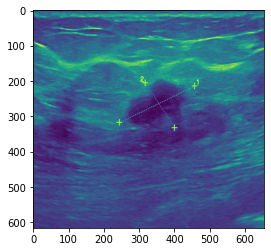

In [11]:
plt.imshow(benign[1200][0])

In [12]:
project_data = benign

In [13]:
feature_matrix = []
label = []
for x,y in project_data:
    feature_matrix.append(x)
    label.append(y)

In [14]:
feature_matrix[1300]

array([[  0, 177, 110, ...,   1,   1,   1],
       [  2,   4,   0, ...,   1,   1,   1],
       [  0,   5,   4, ...,   1,   1,   1],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]], dtype=uint8)

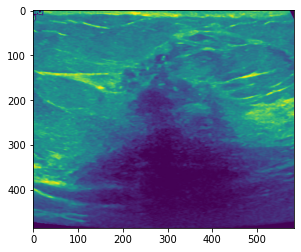

In [15]:
plt.imshow(feature_matrix[1300])

In [16]:
label[1300]

1

In [17]:
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)
    

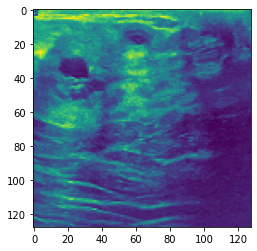

In [18]:
plt.imshow(X[200])

In [19]:
X_cor = []
for image in X:
    image = image/255
    X_cor.append(image)

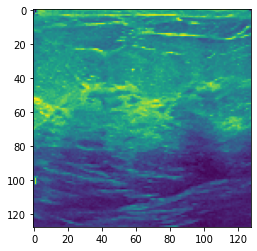

In [20]:
plt.imshow(X_cor[213])

In [21]:
import numpy as np
np.array(X_cor).shape

(1578, 128, 128)

In [22]:
x_model= np.array(X_cor)

In [23]:
x_model.shape[1]

128

In [24]:
print(np.array(X_cor).shape)
print(np.array(X_cor).shape[0])
print(np.array(X_cor).shape[1])
print(np.array(X_cor).shape[2])

(1578, 128, 128)
1578
128
128


In [25]:
x_model.shape

(1578, 128, 128)

In [26]:
x_model_R =x_model.reshape(x_model.shape[0],x_model.shape[1],x_model.shape[2],1)

In [27]:
x_model_R.shape

(1578, 128, 128, 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_model_R,label)

In [29]:
X_train.shape

(1183, 128, 128, 1)

In [30]:
X_test.shape

(395, 128, 128, 1)

In [31]:
path = "/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/malignant"
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


In [32]:
class breast_dataset(torch.utils.data.Dataset):

    def __init__(self,path,transforms=None):
        self.path = path
        self.transfrom = transforms
        self.img_name = []
        self.mask_name = []
        for img in listdir(self.path):
            if img[-8:] == "mask.png" :
                self.mask_name.append(img)
            elif img[-5:] == ").png":
                self.img_name.append(img)
    def __getitem__(self,idx):

        img_path = os.path.join(path,self.img_name[idx])
        mask_path = os.path.join(path,self.mask_name[idx])
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype(np.float32)
        img_nor = img_gray /255
        img_res = torch.as_tensor(img_nor).to(device).permute(2,0,1)
        mask = cv2.imread(mask_path)
        mask_gray = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
        a,mask_01 = cv2.threshold(mask_gray,127,255,cv2.THRESH_BINARY)
        contours,hierarchy = cv2.findContours(mask_01,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        x,y,w,h = cv2.boundingRect((contours[0]))
        mask_ = mask_01.reshape(1,mask_01.shape[0],mask_01.shape[1])
        
        
        labels = [1]
        boxes = [x,y,x+w,y+h]
        target = {}
        target["masks"] = torch.as_tensor(mask_/255,dtype=torch.int64).to(device)
        target["labels"] = torch.as_tensor(labels, dtype=torch.int64).to(device)
        target["boxes"] = torch.as_tensor([boxes]).to(device)
        return img_res,target

    def __len__(self):
        return len(self.img_name)

In [33]:
def model_mask_rcnn(num_class):
    model = maskrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features,num_class)
    return model


def collate_fn(batch):
    return tuple(zip(*batch))

In [34]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



In [35]:
model =  define_model()
history = model.fit(np.array(X_train),np.array(y_train), epochs=20,validation_data=(X_test, np.array(y_test)))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
37/37 [==============================] - 13s 90ms/step - loss: 0.8881 - accuracy: 0.5647 - val_loss: 0.8088 - val_accuracy: 0.6557
Epoch 2/20
37/37 [==============================] - 2s 63ms/step - loss: 0.7819 - accuracy: 0.6737 - val_loss: 0.7523 - val_accuracy: 0.6557
Epoch 3/20
37/37 [==============================] - 2s 64ms/step - loss: 0.6838 - accuracy: 0.6847 - val_loss: 0.6504 - val_accuracy: 0.6734
Epoch 4/20
37/37 [==============================] - 2s 58ms/step - loss: 0.5887 - accuracy: 0.7194 - val_loss: 0.5665 - val_accuracy: 0.7316
Epoch 5/20
37/37 [==============================] - 2s 58ms/step - loss: 0.5235 - accuracy: 0.7591 - val_loss: 0.5316 - val_accuracy: 0.7722
Epoch 6/20
37/37 [==============================] - 2s 58ms/step - loss: 0.5184 - accuracy: 0.7566 - val_loss: 0.5829 - val_accuracy: 0.6987
Epoch 7/20
37/37 [==============================] - 2s 59ms/step - loss: 0.4430 - accuracy: 0.7963 - val_loss: 0.4931 - val_accuracy: 0.7924
Epoch 8/20
3

In [36]:
breast = breast_dataset(path)
data_load = torch.utils.data.DataLoader(
    breast, batch_size=5, shuffle=True,num_workers=0, collate_fn=collate_fn)

num = 2
model1 = model_mask_rcnn(num)
model1.to(device)
num_epoch = 35
param = [param for param in model1.parameters() if param.requires_grad]
optimizer = torch.optim.SGD(param, lr=0.002, momentum=0.9)
lr_scheduler = None
for epoch in range(num_epoch):
    loss_num = 0
    model1.train()
    for img, targets in data_load:
        loss_dic = model1(img, targets)
        loss = sum(loss for loss in loss_dic.values())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_num += loss
    if lr_scheduler is not None:
        lr_scheduler.step()
    print("eppch:{},loss:{}".format(epoch, loss_num))

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

eppch:0,loss:48.49910354614258


OutOfMemoryError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


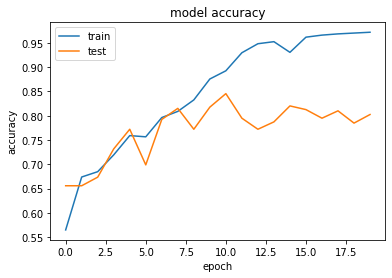

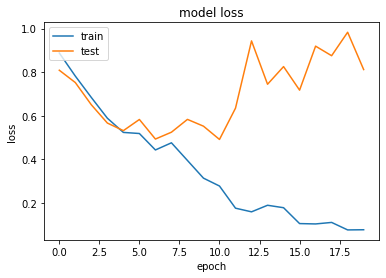

In [37]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
model.evaluate(np.array(X_test),np.array(y_test))

13/13 [==============================] - 0s 21ms/step - loss: 0.8119 - accuracy: 0.8025


[0.8119476437568665, 0.8025316596031189]

In [39]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))

13/13 [==============================] - 1s 12ms/step


In [40]:
X_test.shape

(395, 128, 128, 1)

In [41]:
for item in predicted:
    print(item,)

0
0
0
0
1
0
1
1
1
0
1
0
1
0
2
1
0
1
0
2
0
2
0
2
0
1
2
0
0
0
0
2
1
0
0
0
0
0
1
2
0
0
2
2
0
0
0
0
0
1
2
0
0
0
0
2
1
0
1
1
0
0
1
0
2
2
1
0
0
1
2
0
0
1
0
0
0
2
0
2
0
2
2
0
1
1
0
2
2
1
0
0
0
1
2
1
0
0
1
1
0
0
0
0
2
0
1
0
0
0
1
0
0
0
0
2
0
1
1
0
1
0
1
2
0
0
0
2
2
0
0
1
1
0
2
0
0
0
1
0
0
1
0
1
0
0
1
2
2
0
1
2
0
1
2
0
0
0
0
1
1
2
1
0
2
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
2
0
0
1
0
0
0
0
0
0
1
0
1
0
1
2
0
0
1
0
0
0
1
1
1
2
1
0
0
0
0
0
1
1
0
0
1
1
2
0
0
0
0
0
2
1
0
0
0
1
0
1
1
0
2
1
0
0
2
1
0
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
2
1
0
2
0
0
0
2
2
0
0
0
2
0
1
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
2
0
0
0
1
2
0
1
0
2
0
0
0
0
0
1
1
0
0
1
0
0
0
2
0
2
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
2
0
1
1
0
1
1
0
0
1
0
0
0
2
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
2
0
2
0
1
0
0
1
1
1
0
0
0


In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test,predicted)
conf

array([[197,  20,   7],
       [ 32,  73,   2],
       [  9,   8,  47]])

Text(0.5, 117.59999999999997, 'Predicted')

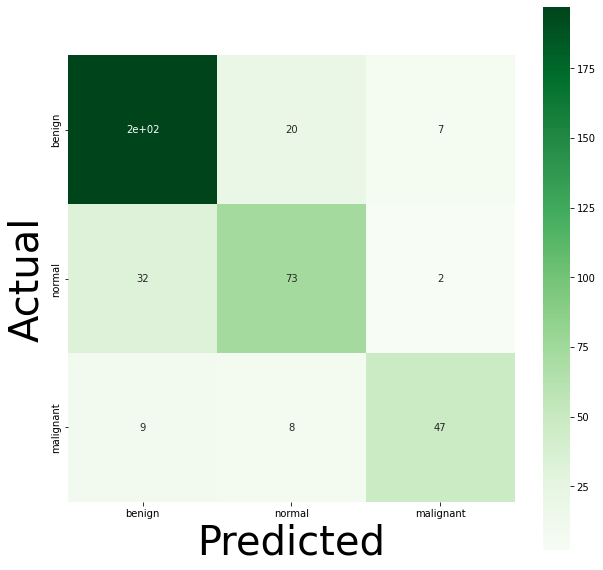

In [43]:
info = [
    'benign'   ,  # 0
    'normal'   ,  # 1
    'malignant',  # 2
]
plt.figure(figsize = (10,10))
ax = sns.heatmap(conf, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

<Axes: >

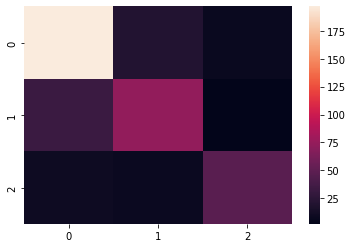

In [44]:
import seaborn as sns
sns.heatmap(conf)

In [45]:
X_test.shape

(395, 128, 128, 1)

In [46]:
img = X_test[222]

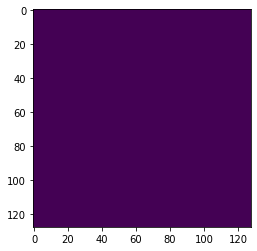

In [47]:
plt.imshow(img)

In [48]:
img1=img.reshape(1,x_model.shape[1],x_model.shape[2],1)

In [49]:
img1.shape

(1, 128, 128, 1)

In [50]:
np.argmax(model.predict(img1))

1/1 [==============================] - 0s 187ms/step


2

In [51]:
def image_prediction(img):
#     plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print("Normal")
    elif predict==1:
        print("Benign ")
    else:
        print("Malignant")
        

In [52]:
image_prediction(X_test[301])

1/1 [==============================] - 0s 22ms/step
Benign 


In [53]:
def new_prediction(img):
    
    IMG_SIZE = 128
    img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 1)

In [54]:
model.save_weights('/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/model.h5')
model.save('/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/Cancer_CNN.model')

In [58]:
import cv2
import tensorflow as tf

CATEGORIES = ["Normal", "Benign", "Malignant"]



model = tf.keras.models.load_model("/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/Cancer_CNN.model")
#model1 = model.load_weights("./model.h5")
prediction = model.predict([new_prediction('/content/drive/MyDrive/dataset/Dataset_BUSI_with_GT/malignant/malignant (1).png')])
   
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])
predict = np.argmax(prediction)


1/1 [==============================] - 0s 248ms/step
[[0. 1. 0.]]
Normal
